<table align="center" width=100%>
    <tr>
        <td>
            <div align="center">
                <font color="#21618C" size=24px>
                    <b> Health Insurance Case study </b>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Data Definition

**age** : Age of the policyholder (Numeric)

**sex:** Gender of policyholder (Categoric)

**bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight (Numeric)

**children:** Number of children covered by health insurance / Number of dependents (Numeric)

**smoker:** Indicates policyholder is a smoker or a non-smoker (non-smoker=0;smoker=1) (Categoric)

**region:** The beneficiary's residential area in the US, northeast, southeast, southwest, northwest.(Categoric)

**charges:**  Individual medical costs billed by health insurance. (Numerical)

In [2]:
# supress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# 'Os' module provides functions for interacting with the operating system 
import os

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
%matplotlib inline

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns # we use seaborn as it gives more smoother visualizations than pyplot but we have to iport pyplot as it uses the output of pyplot to give its own output

# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels 
import statsmodels.api as sm #This allows us to import lot more functionalities in statsmodel libraries 
import statsmodels.stats.api as sms #This allows ws to import only statistical models 
from statsmodels.tools.eval_measures import rmse #evaluates model performance 
from statsmodels.compat import lzip #helps in compacting the data in case the data is to huge and we want to zip it 
from statsmodels.graphics.gofplots import ProbPlot 

# 'SciPy' is used to perform scientific computations
from scipy.stats import f_oneway
from scipy.stats import jarque_bera
from scipy import stats

## 2. Set Options

In [3]:
pd.options.display.max_columns = None # displays all the columns in the dataframe
#pd.options.display.max_rows = None # displays all the rows in the dataset if necessary
pd.options.display.float_format = '{:.6f}'.format # returns an output value upto 6 decimals

## 3. Read Data

In [4]:
df = pd.read_csv('insurance.csv')
df.head() # if you want more than 5 rows use head(number of rows you want to add) 
#df.tail() gives the last 5 values in the datafrmae 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900000,0,yes,southwest,16884.924000
1,18,male,33.770000,1,no,southeast,1725.552300
2,28,male,33.000000,3,no,southeast,4449.462000
3,33,male,22.705000,0,no,northwest,21984.470610
4,32,male,28.880000,0,no,northwest,3866.855200


## 4. Data Analysis and preparation

### 4.1 Understand The Dataset

#### 4.1.1 Data Dimension

In [5]:
df.shape

(1338, 7)

We see that there is 7 columns and 1338 rows, in which 6 columns are the idependent variables whereas the 7th column 'Charges' is the dependent variable.

#### 4.1.2 Data Types 

**1. Check Datatypes**

In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

We see there are object datatypes which is not good as they store the values as string or numbers, hence may take more storage. So we have to convert them to ctaegorical variables which store the string values in a int format reducing the storage size and also ML models don't work with text data they have to be converted to numerics. Most of the time columns such as name,email id etc which have unique values for each row are droppped as there main aim is to track individuals and are not useful for ML models.

**2. Change Datatypes**

In [7]:
df.sex = df.sex.astype('category')
df.smoker = df.smoker.astype('category')
df.region = df.region.astype('category')

**3. Rececking the datatypes after conversion**

In [8]:
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

#### 4.1.3 Summary Statistics

**1.Numerical Values**

In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


1. We see that the count of all the numerical variables is 1338 and so there are no missing values
2. The Avg. BMI of a policy holder is 30 (Whereas the BMI for a healthy human-being should be between 18.5 to 24.9)
3. The Avg. age of a policy holder is 39 
4. We see that almost all the variables have even distributions in each of its quartiles

**2. Categorical Values**

In [10]:
df.describe(include="category")

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


1. Most of the policy holders are male
2. Most of the policy holders are non smokers
3. Most of the policy holders are from southeast area

In [11]:
df.groupby('region').size()

region
northeast    324
northwest    325
southeast    364
southwest    325
dtype: int64

#### 4.1.4 Missing Values

In [12]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Therefore we can see that there is no null values in each attribute

In [13]:
TotalMissingValues = df.isnull().sum().sort_values(ascending=False)

PercentMissingValues = ((df.isnull().sum())*100/len(df)).sort_values(ascending=False)

missingData =  pd.concat([TotalMissingValues,PercentMissingValues], axis=1, keys=['TotalMissingValues','PercentMissingValues'])

missingData

,TotalMissingValues,PercentMissingValues
age,0,0.000000
sex,0,0.000000
bmi,0,0.000000
children,0,0.000000
smoker,0,0.000000
region,0,0.000000
charges,0,0.000000


#### 4.1.5 Correlation 

**1. Filtering out Numerical Columns**

In [14]:
df_numeric_features = df.select_dtypes('number')
df_numeric_features.columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

**2. Calling the correlation Function on the select Numeric Columns**

In [15]:
df_corr = df_numeric_features.corr()

df_corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


1. The correlation between the columns are very minimal

**3a. Plotting the heatmap() to visulaise corelation** 

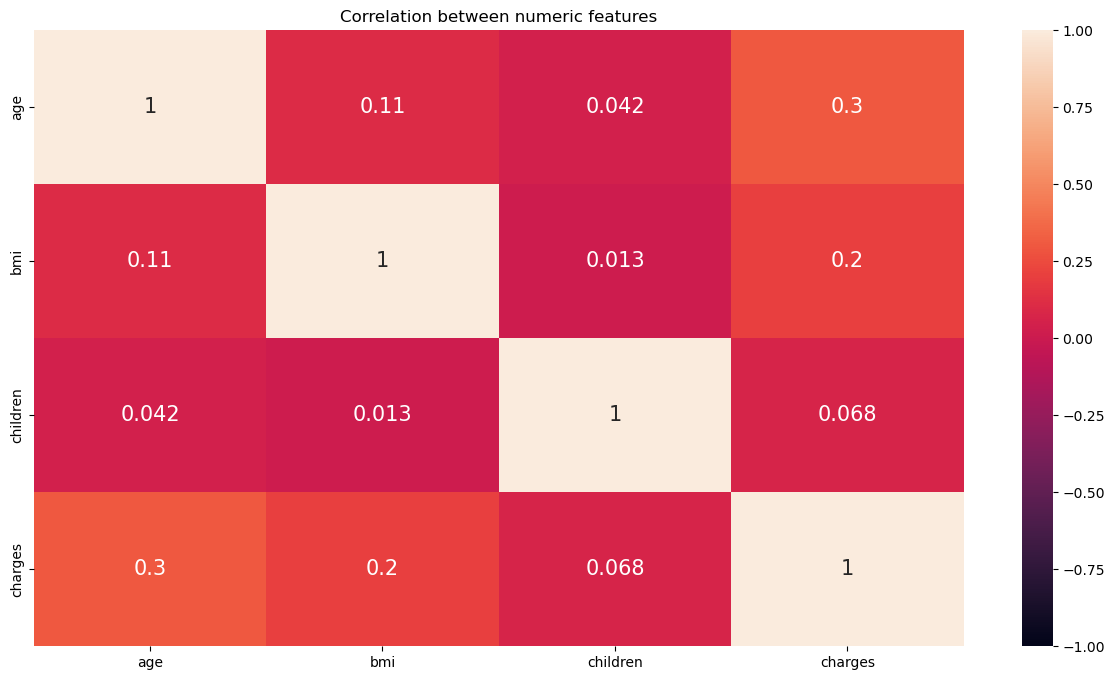

In [16]:
plt.figure(figsize=(15,8))

sns.heatmap(df_corr, vmax=1.00, vmin=-1.00, annot=True, annot_kws={"size":15}) #annot_kws is the font size of the text inside the heatmaps
plt.title('Correlation between numeric features')
plt.show()

1. We see that there the features are not correlated.
2. Value of Correlation doesnot mean two attributes are not correlated it means that they are not linearly related.

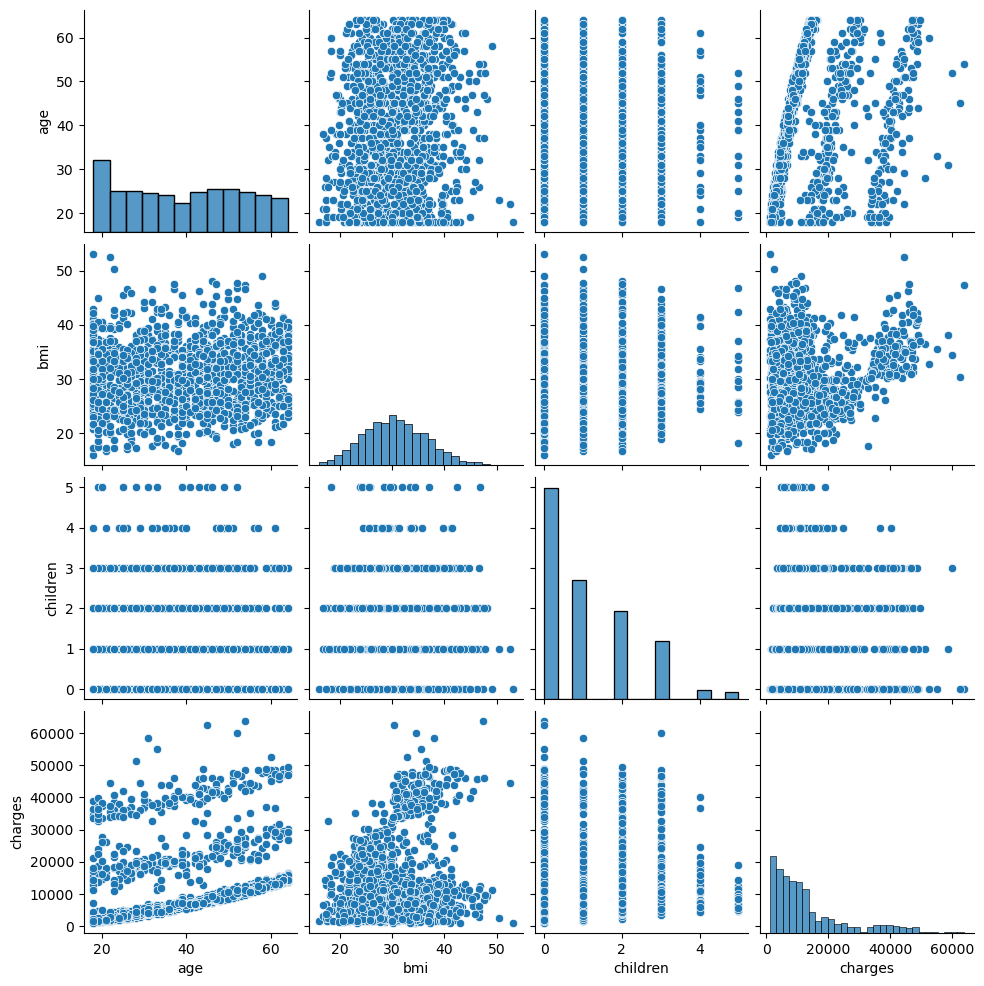

In [17]:
sns.pairplot(df,kind='scatter')
plt.show()

**4.1.6 Analyze Categorical Values**

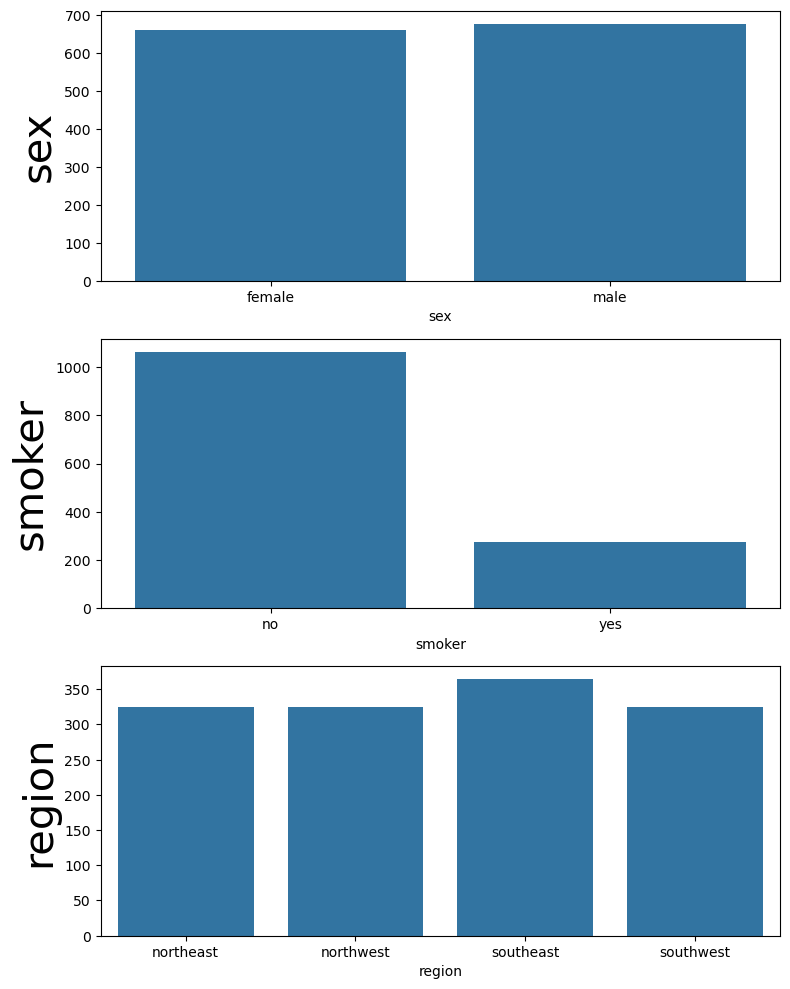

In [18]:
df_category_features = df.select_dtypes('category')

fig, ax = plt.subplots(3,1,figsize=(8,10))
#plt.sublot returns two values one if figure size that specifies the size of the charts and ax which specifies the axis point where these charts must be present
#axis value here have a values [ax[0,0] ax[1,0] ax[2,0]]
#zip combines 2 values of different iteraters together as a tuple
for variable, subplot in zip(df_category_features, ax.flatten()): #we use ax.flatten here because in case we give values in subplots as (2,2) which is 2 rows and 2 coulmns it is stored as a 2D array [[[ax[0,0] ax[0,1]], [ax[1,0],ax[1,1]]] which is a 2D array and hence must be flatten to a 1D array before being plot to [ ax[0,0],ax[0,1],ax[1,0],ax[1,1]]
    countplot =  sns.countplot(x=df[variable], ax=subplot)
    countplot.set_ylabel(variable, fontsize = 30)

plt.tight_layout()
plt.show()

1. We see that the count of male and female is almost equal
2. We see that the number of non smokers is more than number of smokers
3. We see that all the regions have same number except SE which is a it higher

**4.1.7 Analyzing Relationship between Target and   Categorical Variables**

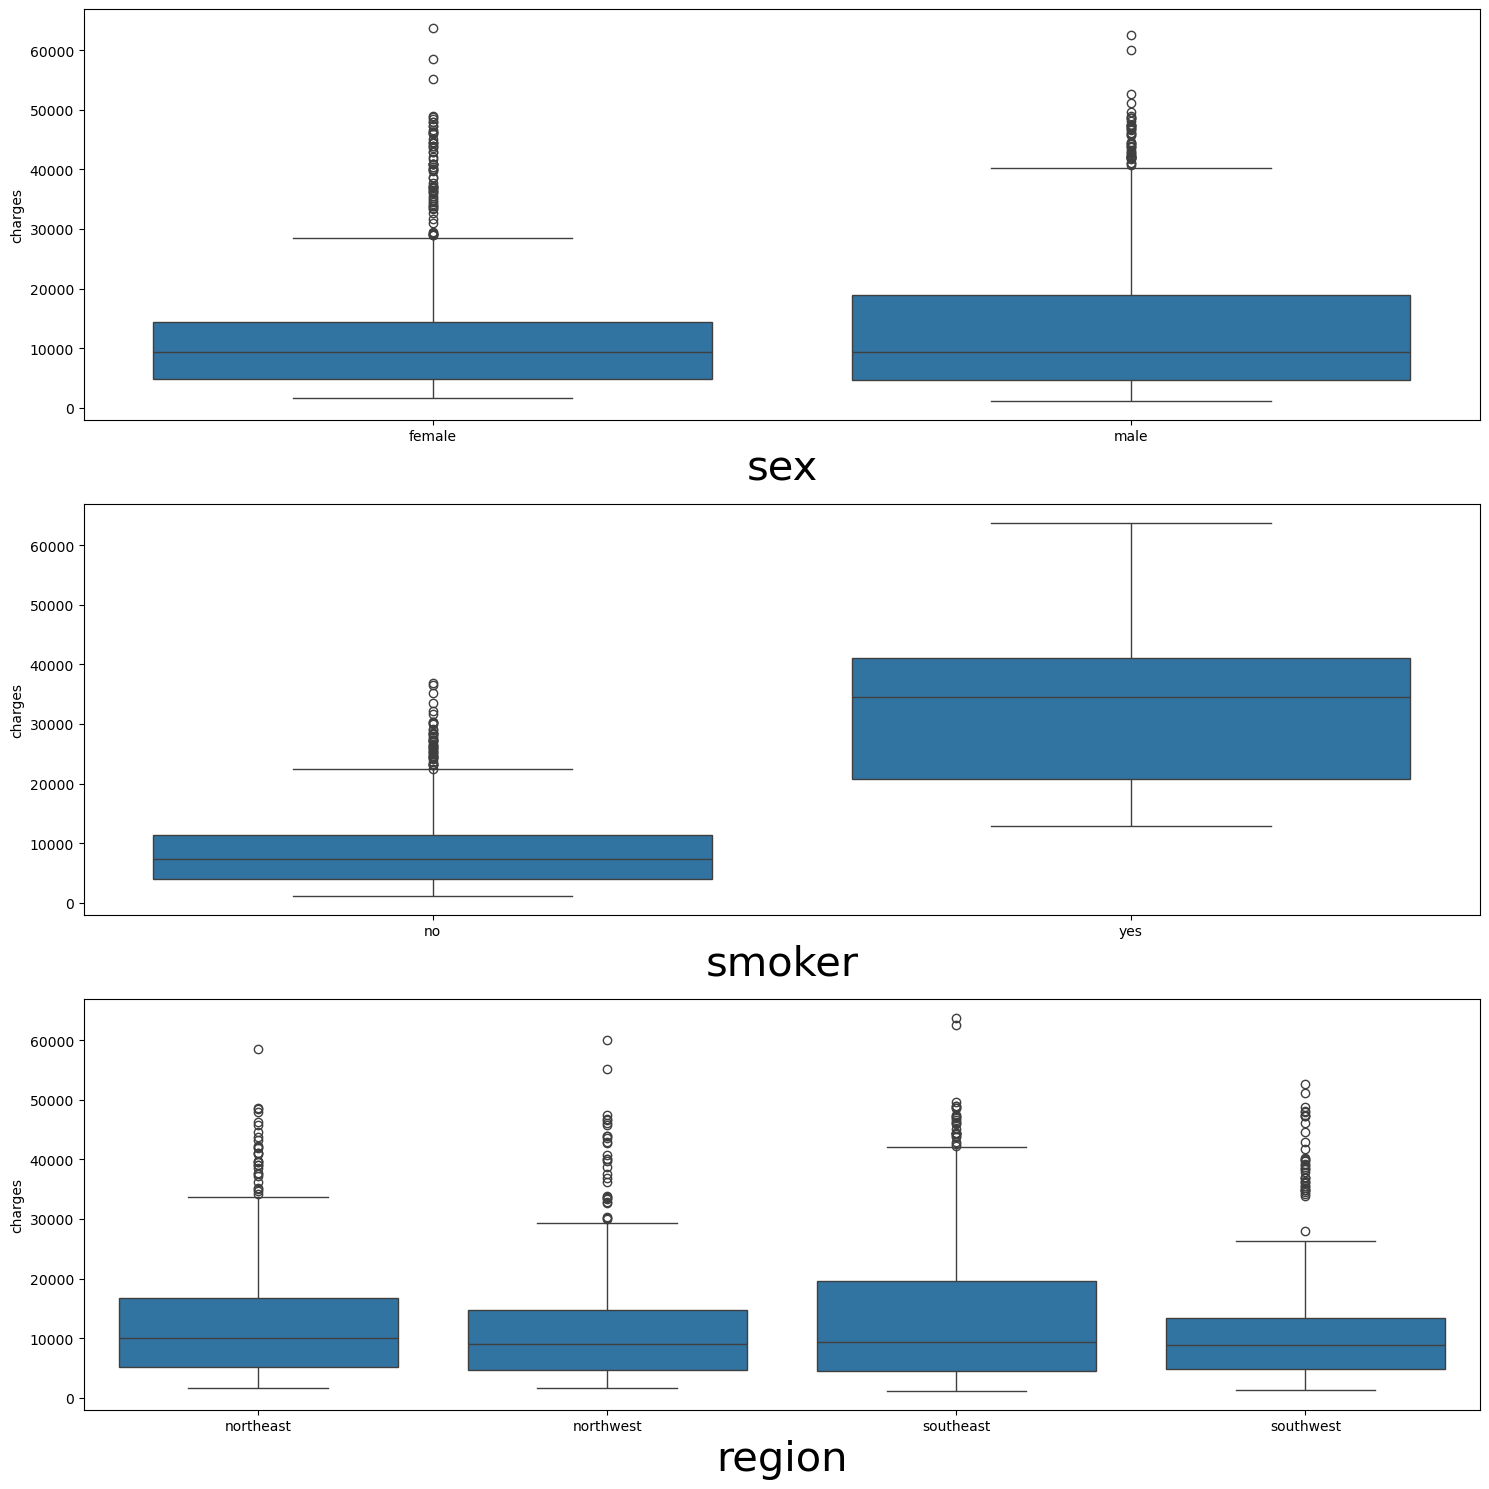

In [19]:
fig,ax = plt.subplots(3,1,figsize=(15,15))

for variable,subplot in zip(df_category_features, ax.flatten()):
    box_plot = sns.boxplot(x=variable, y='charges',data=df,ax=subplot)
    box_plot.set_xlabel(variable, fontsize=30)

plt.tight_layout()
plt.show()

1. We see that the charges across the genders is almost same.
2. The difference in distribution of charges against smokers and non smokers is significant enough to differentiate that charges are more for smokers than non smokers.
3. We see that for regions the ditribution against charges is similar throughout except for SE, which can be interpreted as because of sample size difference.

**4.1.8 Discovering Outliers in Numerical variables**

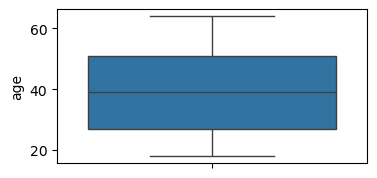

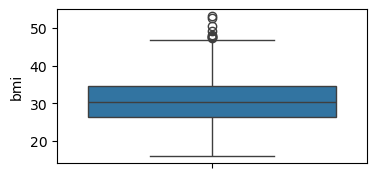

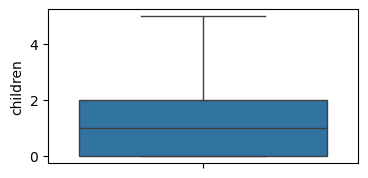

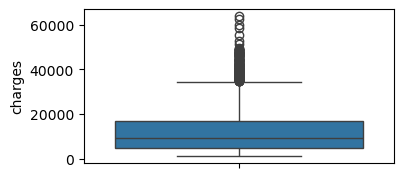

In [20]:
for var in df_numeric_features.columns:
    plt.figure(figsize=(4,2))
    sns.boxplot(df[var])
    plt.show()

Though we see that there are outliers in charges and bmi colum but we wont be removing those right now as number of data points are more and might be significant enough to be considered. 


### 4.2 Prepareing the Data

#### 4.2.1 Check For Normality

As per the assumptions of linear resgression residuals (actual - predicted) must be normally ditributed. If the target variable is normaly distributed then the residuals are also normaly distributed, thus we check normality only for target variable.

**1. Plot the histogram and perform Shapiro test**

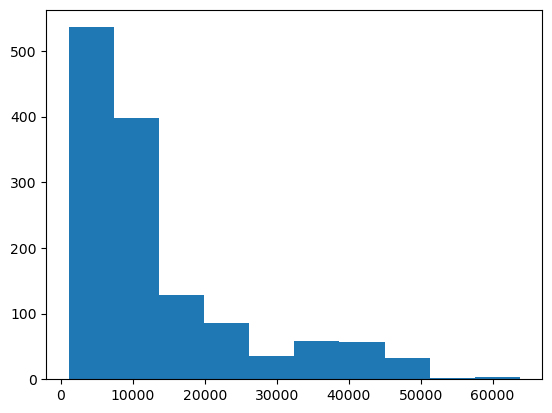

In [21]:
plt.hist(df['charges'])
plt.show()

We see that the data id right skewed and not normaly ditributed 

Now statisticaly let us check if the data is normaly ditributed using Shapiro Wilk's test

The Null and ALternate Hypothesis of Shapiro Wilk test are 
H0: The data is normaly distributed
H1: The data is not normaly dirtibuted

In [22]:
from scipy.stats import shapiro

stat, p = shapiro(df['charges'])

print(f'p={round(p,4)},stat={round(stat,4)}')

alpha = 0.05 

if p>alpha:
    print('The data is normaly distriuted (fail to reject H0)')
else:
    print('The data is not normaly ditributed (reject H0)')

p=0.0,stat=0.8147
The data is not normaly ditributed (reject H0)


Therefore we can conclude that the data is not normaly distributed 

**2. If the data is not normally distributed, use log trnasformation to get to near normal distribution**


In [23]:
df['log_charges'] = np.log(df['charges'])
df.head()

,age,sex,bmi,children,smoker,region,charges,log_charges
0,19,female,27.900000,0,yes,southwest,16884.924000,9.734176
1,18,male,33.770000,1,no,southeast,1725.552300,7.453302
2,28,male,33.000000,3,no,southeast,4449.462000,8.400538
3,33,male,22.705000,0,no,northwest,21984.470610,9.998092
4,32,male,28.880000,0,no,northwest,3866.855200,8.260197


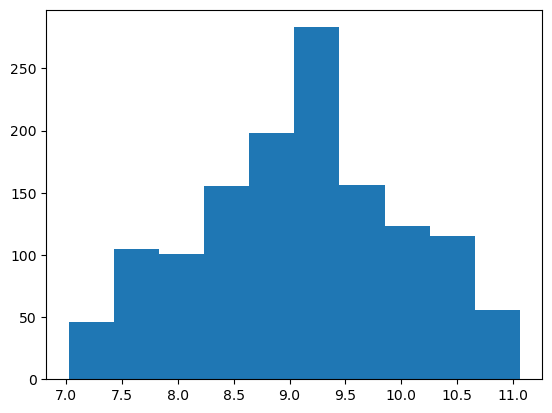

In [24]:
plt.hist(df['log_charges'])
plt.show()

In [25]:
from scipy.stats import shapiro

stat, p = shapiro(df['log_charges'])

print(f'p={round(p,4)},stat={round(stat,4)}')

alpha = 0.05 

if p>alpha:
    print('The data is normaly distriuted (fail to reject H0)')
else:
    print('The data is not normaly ditributed (reject H0)')

p=0.0,stat=0.9832
The data is not normaly ditributed (reject H0)


Thus we can conclude though we transform the data to log the target data is not normaly distributed.

#### 4.2.2 One-Way ANOVA

Let us see if the mean of charges for Women and Men are different ny performing one way ANOVA test
H0: Population mean are equal
h1: Population mean are not equal

In [26]:
f_oneway(df['charges'][df['sex']=='male'], df['charges'][df['sex']=='female'])

F_onewayResult(statistic=4.3997016974374565, pvalue=0.03613272100596256)

The F-statistic = 4.399 with p-value < 0.05 indicates a significant difference in the mean charges between male and female. While one option is to build separate models for each gender, splitting the dataset reduces sample size and may lead to overfitting, especially when combined with other features (curse of dimensionality). A more efficient approach is to include gender as a categorical feature within a single regression model.

#### 4.2.3 Dummy Encoding of Categorical Variables

The Linear regression model that we are developing are developed by OLS method and it dosen't work well with the categrical values, to overcome this we do dummy encoding on categorical variables.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          1338 non-null   int64   
 1   sex          1338 non-null   category
 2   bmi          1338 non-null   float64 
 3   children     1338 non-null   int64   
 4   smoker       1338 non-null   category
 5   region       1338 non-null   category
 6   charges      1338 non-null   float64 
 7   log_charges  1338 non-null   float64 
dtypes: category(3), float64(3), int64(2)
memory usage: 56.8 KB


In [28]:
df_numerical_features=df.select_dtypes(include=['int','float'])
df_numerical_features.columns

Index(['age', 'bmi', 'children', 'charges', 'log_charges'], dtype='object')

In [29]:
df_category_features.columns
df_category_features.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [30]:
df_categorical_features = df.select_dtypes('category')
df_categorical_features.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [31]:
df_categorical_features = df.select_dtypes('category')
df_categorical_features.head()

for col in df_categorical_features.columns.values:
    if df_categorical_features[col].dtype == 'object' or str(df_categorical_features[col].dtype) == 'category':#ensure the column name dosen't change on multple running of this code block
        dummy_encoded_variable = pd.get_dummies(df_categorical_features[col], prefix=col,drop_first=True, dtype=int)
        df_categorical_features = pd.concat([df_categorical_features,dummy_encoded_variable], axis=1)
        df_categorical_features.drop([col],axis=1,inplace=True) 


In [32]:
df_dummy = pd.concat([df_numerical_features,df_categorical_features], axis=1)
df_dummy.head()

,age,bmi,children,charges,log_charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900000,0,16884.924000,9.734176,0,1,0,0,1
1,18,33.770000,1,1725.552300,7.453302,1,0,0,1,0
2,28,33.000000,3,4449.462000,8.400538,1,0,0,1,0
3,33,22.705000,0,21984.470610,9.998092,1,0,1,0,0
4,32,28.880000,0,3866.855200,8.260197,1,0,1,0,0


We have obtained dummy variables for each categorical variable.

We see that for each categorical column one column that should have contained values of one feature is missing(eg for sex 'female' is missing), this is because if we do provide a column for that particular feature then it would be very easy to predict the values and the model would be overfit. 

Hence dummy encoding of categorical variables creates n-1 variables for each categorical varibales, where n is the number of classes in the categorical feature. So for a variable 'region', which has 4 levels, it has created 3 dummy encoded variables. 

In [33]:
df_dummy.dtypes

age                   int64
bmi                 float64
children              int64
charges             float64
log_charges         float64
sex_male              int32
smoker_yes            int32
region_northwest      int32
region_southeast      int32
region_southwest      int32
dtype: object

## 5. Linear Regression (OLS)

### 5.1 Simple Linear Regression Model (OLS)

For now I am just considering simple linear regression model that for one independent variable how does the dependent variable react 

In [34]:
X = sm.add_constant(df_dummy.age)
y = df_dummy.charges

In [35]:
X.head()

,const,age
0,1.000000,19
1,1.000000,18
2,1.000000,28
3,1.000000,33
4,1.000000,32


In [36]:
SLR = sm.OLS(y,X).fit()
print(SLR.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     131.2
Date:                Wed, 10 Sep 2025   Prob (F-statistic):           4.89e-29
Time:                        11:21:25   Log-Likelihood:                -14415.
No. Observations:                1338   AIC:                         2.883e+04
Df Residuals:                    1336   BIC:                         2.884e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3165.8850    937.149      3.378      0.0

This model has a R-sqaure value of 0.089. The Durbin-watson test statistics is 2.033 indicates that there is no auto correlation. The p-value of the JB test is nearly 0 and indicates that the residuals are not normally distributed.

### 5.2 Multiple Linear Regression - Full Model - with Log Transformed Dependent Variable (OLS)

In [37]:
df_dummy =sm.add_constant(df_dummy)

X = df_dummy.drop(['charges','log_charges'], axis=1)

y = df_dummy[['log_charges','charges']]

#### 5.2.1 Splitting data in train and test

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)
#random=1 specifies that the random functions are used to split the data to trai ad test

#### 5.2.2 Build model using sm.OLS().fit()

In [39]:
linreg_full_model_with_log = sm.OLS(y_train['log_charges'],X_train).fit()

print(linreg_full_model_with_log.summary())

                            OLS Regression Results                            
Dep. Variable:            log_charges   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     399.8
Date:                Wed, 10 Sep 2025   Prob (F-statistic):          1.96e-304
Time:                        11:21:25   Log-Likelihood:                -618.13
No. Observations:                1003   AIC:                             1254.
Df Residuals:                     994   BIC:                             1298.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                7.0775      0.084  

This model explains 76.4% of the variation in the dependent variable charges. We can also see that the Adjusted R2 is close to R2 which tells us that might not be significant. The Durbin Watson test is 2.046 and indicates that there is no autocorrelation. The Jargue Bera test specifies that the errors are not normaly distributed.

#### 5.2.3 Model Evaluation

In [40]:
score_card = pd.DataFrame(columns=['Model Name','R-Squared','Adj.R-Squared','RMSE'])

In [41]:
predicted_claim = linreg_full_model_with_log.predict(X_test)
actual_claim = y_test['charges']

In [42]:
linereg_full_model_with_log_charges_rmse = rmse(actual_claim,predicted_claim)

linereg_full_model_with_log_charges_rsquared = linreg_full_model_with_log.rsquared

linereg_full_model_with_log_charges_adjusted_rsq = linreg_full_model_with_log.rsquared_adj

linreg_full_model_with_log_metrics = pd.Series({
                     'Model_Name': "Linreg full model with log of target variable",
                     'RMSE':linereg_full_model_with_log_charges_rmse,
                     'R-Squared': linereg_full_model_with_log_charges_rsquared,
                     'Adj. R-Squared': linereg_full_model_with_log_charges_adjusted_rsq     
                   })

linreg_full_model_with_log_metrics

Model_Name        Linreg full model with log of target variable
RMSE                                               17291.501815
R-Squared                                              0.762914
Adj. R-Squared                                         0.761006
dtype: object

In [43]:
score_card = pd.concat([linreg_full_model_with_log_metrics.to_frame().T],axis=1)

# print the result table
score_card

,Model_Name,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model with log of target variable,17291.501815,0.762914,0.761006


In [44]:
#we add a constant so that the model has the freedom to choose the point where the best intecepts independent variable
df_dummy = sm.add_constant(df_dummy)

#splitting the dependeent and independent variables
X = df_dummy.drop(['charges','log_charges'], axis=1)

y = df_dummy[['charges','log_charges']]

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

print('The shape of X_train is', X_train.shape)
print('The shape of X_test is', X_test.shape)
print('The shape of y_train is', y_train.shape)
print('The shape of y_test is', y_test.shape)

The shape of X_train is (1003, 9)
The shape of X_test is (335, 9)
The shape of y_train is (1003, 2)
The shape of y_test is (335, 2)


### 5.3  Multiple Linear Regression - Full Model - without Log Transformed Dependent Variable (OLS)

#### 5.3.1 Build model using sm.OLS().fit()

In [45]:
linereg_full_model_without_log_charges = sm.OLS(y_train['charges'],X_train).fit()

print(linereg_full_model_without_log_charges.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     383.5
Date:                Wed, 10 Sep 2025   Prob (F-statistic):          1.23e-297
Time:                        11:21:26   Log-Likelihood:                -10160.
No. Observations:                1003   AIC:                         2.034e+04
Df Residuals:                     994   BIC:                         2.038e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.121e+04   1138.444  

We see that the model explan about 75% variation in the dependent variable. 

#### 5.3.2 Dropping the columns with p value greater than 0.05

In [46]:
df_OLS = df_dummy.drop(['children','sex_male','region_northwest', 'region_southwest', 'region_southeast'], axis=1)
df_OLS

X = df_OLS.drop(['charges','log_charges'], axis=1)
y = df_OLS[['charges']]

X_trainC, X_testC, y_trainC, y_testC = train_test_split(X,y, random_state=1)

print('The shape of X_trainC is', X_trainC.shape)
print('The shape of X_testC is', X_testC.shape)
print('The shape of y_trainC is', y_trainC.shape)
print('The shape of y_testC is', y_testC.shape)

The shape of X_trainC is (1003, 4)
The shape of X_testC is (335, 4)
The shape of y_trainC is (1003, 1)
The shape of y_testC is (335, 1)


In [47]:
linereg_full_model_without_log_charges_columns = sm.OLS(y_trainC,X_trainC).fit()

print(linereg_full_model_without_log_charges_columns.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     1016.
Date:                Wed, 10 Sep 2025   Prob (F-statistic):          6.19e-303
Time:                        11:21:26   Log-Likelihood:                -10164.
No. Observations:                1003   AIC:                         2.034e+04
Df Residuals:                     999   BIC:                         2.036e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.095e+04   1077.534    -10.165      0.0

There is not much difference in the values of R-squared and Adjusted R-squared tough we remove the column for which the P value was greater than 0.05. 

#### 5.3.3 Model Evaluation

In [48]:
predicted_claim = linereg_full_model_without_log_charges.predict(X_test)

actual_claim = y_test['charges']

In [49]:
#Computing model accuracy
linereg_full_model_without_log_charges_rmse = rmse(actual_claim,predicted_claim)

linereg_full_model_without_log_charges_rsquared = linereg_full_model_without_log_charges.rsquared

linereg_full_model_without_log_charges_adjusted_rsq = linereg_full_model_without_log_charges.rsquared_adj

linreg_full_model_withoutlog_metrics = pd.Series({
                     'Model_Name': "Linreg full model without log of target variable",
                     'RMSE':linereg_full_model_without_log_charges_rmse,
                     'R-Squared': linereg_full_model_without_log_charges_rsquared,
                     'Adj. R-Squared': linereg_full_model_without_log_charges_adjusted_rsq     
                   })

linreg_full_model_withoutlog_metrics


Model_Name        Linreg full model without log of target variable
RMSE                                                   5982.567065
R-Squared                                                 0.755314
Adj. R-Squared                                            0.753344
dtype: object

In [50]:
frames = [linreg_full_model_with_log_metrics.to_frame().T, linreg_full_model_withoutlog_metrics.to_frame().T]

score_card = pd.concat(frames, ignore_index=1)

# print the result table
score_card

,Model_Name,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model with log of target variable,17291.501815,0.762914,0.761006
1,Linreg full model without log of target variable,5982.567065,0.755314,0.753344


We see that the R square and Adjusted R square remains same that is around 75% and there is no improvement. GOing forward let us see how we can improve the model performance.

### 5.4 Multiple Linear Regression - Full Model - with interactive variable (OLS)

##

Let us create a interaction column(variable) wher we will be adding a new column depending upon how 2 variables are related(we get to know about the relationship by using the par plot or heat map).
Here we will come with theinteraction variable considering the BMI and smoker

#### 5.4.1 Computing the interaction effect

In [51]:
df_interaction = df_dummy.copy()   

df_interaction['bmi_mul_smoker'] = df_interaction['bmi']*df_interaction['smoker_yes']

df_interaction.head()

,const,age,bmi,children,charges,log_charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,bmi_mul_smoker
0,1.000000,19,27.900000,0,16884.924000,9.734176,0,1,0,0,1,27.900000
1,1.000000,18,33.770000,1,1725.552300,7.453302,1,0,0,1,0,0.000000
2,1.000000,28,33.000000,3,4449.462000,8.400538,1,0,0,1,0,0.000000
3,1.000000,33,22.705000,0,21984.470610,9.998092,1,0,1,0,0,0.000000
4,1.000000,32,28.880000,0,3866.855200,8.260197,1,0,1,0,0,0.000000


#### 5.4.2 Spliting Data into train and test

In [52]:
X = df_interaction.drop(['charges','log_charges'], axis =1)
y = df_interaction['charges']

X_interaction_train,X_interaction_test,y_interaction_train,y_interaction_test = train_test_split(X,y,random_state=1)

print('The shape of X_trainC is', X_interaction_train.shape)
print('The shape of X_testC is', X_interaction_test.shape)
print('The shape of y_trainC is', y_interaction_train.shape)
print('The shape of y_testC is', y_interaction_test.shape)

The shape of X_trainC is (1003, 10)
The shape of X_testC is (335, 10)
The shape of y_trainC is (1003,)
The shape of y_testC is (335,)


#### 5.4.3 Build model using sm.OLS().fit()

In [53]:
linreg_with_interaction = sm.OLS(y_interaction_train, X_interaction_train).fit()

print(linreg_with_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     585.2
Date:                Wed, 10 Sep 2025   Prob (F-statistic):               0.00
Time:                        11:21:26   Log-Likelihood:                -9942.7
No. Observations:                1003   AIC:                         1.991e+04
Df Residuals:                     993   BIC:                         1.995e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1774.7556   1003.103  

We see that the P value of the interaction variable is less and near to 0 so we can say that it is important.

#### 5.4.4 Model Evaluation

In [54]:
predicted_claim = linreg_with_interaction.predict(X_interaction_test)

actual_claim = y_interaction_test

In [55]:
#Computing model accuracy
linereg_with_interaction_rmse = rmse(actual_claim,predicted_claim)

linereg_with_interaction_rsquared = linreg_with_interaction.rsquared

linereg_with_interaction_rsq = linreg_with_interaction.rsquared_adj

linereg_with_interaction_metrics = pd.Series({
                     'Model_Name': "Linreg with interaction variable",
                     'RMSE':linereg_with_interaction_rmse,
                     'R-Squared': linereg_with_interaction_rsquared,
                     'Adj. R-Squared': linereg_with_interaction_rsq     
                   })

linereg_with_interaction_metrics


Model_Name        Linreg with interaction variable
RMSE                                   4672.893439
R-Squared                                 0.841378
Adj. R-Squared                            0.839940
dtype: object

In [56]:
frames = [linreg_full_model_with_log_metrics.to_frame().T, linreg_full_model_withoutlog_metrics.to_frame().T,linereg_with_interaction_metrics.to_frame().T]

score_card = pd.concat(frames, ignore_index=1)

# print the result table
score_card

,Model_Name,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model with log of target variable,17291.501815,0.762914,0.761006
1,Linreg full model without log of target variable,5982.567065,0.755314,0.753344
2,Linreg with interaction variable,4672.893439,0.841378,0.839940


We see that there is a significant increase in the value of R-squared and adjusted R-squarerd when we use the interaction variable. 

### 6. Gradient Descent

#### 6.1 Scaling Data

We ae acaling that as the efficiency of the algorithm increases than when we consider data that is not scaled

In [57]:
df_numerical_features['bmi_mul_smoker'] = df_numerical_features['bmi']*df_categorical_features['smoker_yes']

In [58]:
y = df_numerical_features[['charges']]

In [59]:
df_numeric_features = df_numerical_features.drop(['charges', 'log_charges'], axis=1)

In [60]:
df_numeric_features.head()

,age,bmi,children,bmi_mul_smoker
0,19,27.900000,0,27.900000
1,18,33.770000,1,0.000000
2,28,33.000000,3,0.000000
3,33,22.705000,0,0.000000
4,32,28.880000,0,0.000000


In [61]:
df_categorical_features.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0,1,0,0,1
1,1,0,0,1,0
2,1,0,0,1,0
3,1,0,1,0,0
4,1,0,1,0,0


In [62]:
X_scaled = pd.concat([df_numeric_features.reset_index(drop=True), df_categorical_features.reset_index(drop=True)], axis=1)

In [63]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, random_state=1)

In [64]:
X_train_scaled.shape, X_test_scaled.shape

((1003, 9), (335, 9))

In [65]:
y_train_scaled.shape, y_test_scaled.shape

((1003, 1), (335, 1))

In [66]:
scaler_ind = StandardScaler()
scaler_ind.fit(X_train_scaled)# we have to first fit the data so that it caculates its mean and std dev

StandardScaler()

In [67]:
X_train_scaled = pd.DataFrame(scaler_ind.transform(X_train_scaled), columns=X_train_scaled.columns)# we use transform to fit the data in the sacle that was calculated earlier

#we just fit the test train data and npt the test data because if we fit the test data as well then it will get to know its mean and std dev which is not right while we want to predict the target values without any underlying factors.


X_test_scaled = pd.DataFrame(scaler_ind.transform(X_test_scaled),   # transform only takes the data
    columns=X_test_scaled.columns          # re-attach the original column names
)

In [68]:
X_train_scaled.head()

,age,bmi,children,bmi_mul_smoker,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-0.779886,-0.805683,-0.907059,-0.504981,-1.027292,-0.517702,-0.565453,-0.605380,1.726314
1,-1.280350,-0.814660,0.739602,-0.504981,0.973434,-0.517702,-0.565453,-0.605380,-0.579269
2,0.149548,1.554541,-0.907059,-0.504981,0.973434,-0.517702,-0.565453,1.651855,-0.579269
3,1.722435,0.477260,1.562933,-0.504981,0.973434,-0.517702,-0.565453,1.651855,-0.579269
4,1.793930,-0.706116,-0.907059,-0.504981,0.973434,-0.517702,-0.565453,-0.605380,-0.579269


In [69]:
scaler_target = StandardScaler()
scaler_target.fit(np.array(y_train_scaled).reshape((-1,1)))
y_train_scaled = scaler_target.fit_transform(np.array(y_train_scaled).reshape((-1,1)))

y_test_scaled = scaler_target.transform(np.array(y_test_scaled).reshape((-1,1)))

#### 6.2 Linear Regression With Stochastic Gradient Descent

In [70]:
from sklearn.linear_model import SGDRegressor

linreg_with_SGD = SGDRegressor()

linreg_with_SGD = linreg_with_SGD.fit(X_train_scaled, y_train_scaled)
#A random record is considered and its error is calculated and the error is minimized and by doing so the best fit line is found
#Only 1000 random samples are considered as the number of records to be used is not mentioned 

In [71]:
linreg_with_SGD_prediction = scaler_target.inverse_transform(linreg_with_SGD.predict(X_test_scaled).reshape(-1,1))

In [72]:
y_test = scaler_target.inverse_transform(y_test_scaled.reshape(-1,1))

In [73]:
linreg_SGD_mse = mean_squared_error(y_test, linreg_with_SGD_prediction)
linreg_SGD_rmse = np.sqrt(linreg_SGD_mse) # square root of MSE which brings back the units to original

linereg_SGD_r_squared = r2_score(y_test, linreg_with_SGD_prediction)

linereg_Adjusted_r_squared = 1 - (1-linereg_SGD_r_squared)*(len(y_test)-1)/(len(y_test) - X_test.shape[1] - 1)
#X_test.shape[1] - gives number of columns 

In [74]:
linereg_SGD_metrics = pd.Series({
                     'Model_Name': "Linreg SGD",
                     'RMSE':linreg_SGD_rmse,
                     'R-Squared': linereg_SGD_r_squared,
                     'Adj. R-Squared': linereg_Adjusted_r_squared     
                   })

linereg_SGD_metrics


Model_Name        Linreg SGD
RMSE             5144.095031
R-Squared           0.803281
Adj. R-Squared      0.797834
dtype: object

In [75]:
linereg_SGD_metrics_df = pd.DataFrame(linereg_SGD_metrics).T


In [76]:
score_card = pd.concat([score_card, linereg_SGD_metrics_df], ignore_index=1)

In [77]:
score_card

,Model_Name,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model with log of target variable,17291.501815,0.762914,0.761006
1,Linreg full model without log of target variable,5982.567065,0.755314,0.753344
2,Linreg with interaction variable,4672.893439,0.841378,0.839940
3,Linreg SGD,5144.095031,0.803281,0.797834


We see that the values of R-squared and Adjusted R-squared value have decreased, this maybe becasue we did not specify the number of iterations and chose the default 1000 iterations of SGD model. Let us now see what happens when we increase the number of ierations.

In [78]:
linreg_with_SGD_2000 = SGDRegressor(max_iter=2000)

linreg_with_SGD_2000 = linreg_with_SGD_2000.fit(X_train_scaled, y_train_scaled)

In [79]:
linreg_with_SGD_2000_prediction = scaler_target.inverse_transform(linreg_with_SGD_2000.predict(X_test_scaled).reshape(-1,1))

In [80]:
y_test = scaler_target.inverse_transform(y_test_scaled.reshape(-1,1))

In [81]:
linreg_SGD_2000_mse = mean_squared_error(y_test, linreg_with_SGD_2000_prediction)
linreg_SGD_2000_rmse = np.sqrt(linreg_SGD_2000_mse) # square root of MSE which brings back the units to original

linereg_SGD_2000_r_squared = r2_score(y_test, linreg_with_SGD_2000_prediction)

linereg_Adjusted_2000_r_squared = 1 - (1-linereg_SGD_2000_r_squared)*(len(y_test)-1)/(len(y_test) - X_test.shape[1] - 1)
#X_test.shape[1] - gives number of columns 

In [82]:
linereg_SGD_2000_metrics = pd.Series({
                     'Model_Name': "Linreg SGD 2000",
                     'RMSE':linreg_SGD_2000_rmse,
                     'R-Squared': linereg_SGD_2000_r_squared,
                     'Adj. R-Squared': linereg_Adjusted_2000_r_squared     
                   })

linereg_SGD_2000_metrics

Model_Name        Linreg SGD 2000
RMSE                  5130.501846
R-Squared                0.804319
Adj. R-Squared           0.798901
dtype: object

In [83]:
linereg_SGD_2000_metrics_df = pd.DataFrame(linereg_SGD_2000_metrics).T

In [84]:
score_card = pd.concat([score_card,linereg_SGD_2000_metrics_df], ignore_index=1)

In [85]:
score_card = score_card.drop_duplicates(subset=['Model_Name'], keep='first')


In [86]:
score_card

,Model_Name,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model with log of target variable,17291.501815,0.762914,0.761006
1,Linreg full model without log of target variable,5982.567065,0.755314,0.753344
2,Linreg with interaction variable,4672.893439,0.841378,0.839940
3,Linreg SGD,5144.095031,0.803281,0.797834
4,Linreg SGD 2000,5130.501846,0.804319,0.798901


We see that there is not much difference bwteen R-Squared and Adjusted R-Squared values.

#### 6.2 Linear Regression With SGD and Grid Search CV

In [87]:
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': 10.0**-np.arange(1,7),
              'loss': ['squared_error'],
              'penalty': ['l2','l1','elasticnet'],
              'learning_rate':['constant','optimal','invscaling']}

reg = GridSearchCV(linreg_with_SGD, param_grid)

reg.fit(X_train_scaled, y_train_scaled)

#alpha: it is the penalty term value of the regressor method that needs to be added
#loss: it the type of loss function to be used here we have considered linear regression so the loss function is 'Squared_error'
#penalty: it is the type of regressor that needs to be selected, l2: Ridge, l1: Lasso, elasticnet: mixture of both Ridge and Lasso
#learning_rate: constant:uses fixed learning rate(eta0), 
# optimal:chooses learning rate based on a heuristics(practical shortcuts that work well in many cases, but are not mathematically guaranteed to be the very best) , 
# invascaling: decreases learning rate over time

GridSearchCV(estimator=SGDRegressor(),
             param_grid={'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06]),
                         'learning_rate': ['constant', 'optimal', 'invscaling'],
                         'loss': ['squared_error'],
                         'penalty': ['l2', 'l1', 'elasticnet']})

In [88]:
print('Best alpha:', reg.best_estimator_.alpha)
#eta0: the best strating rate
print('Best eta:', reg.best_estimator_.eta0)

#determines the best tolerance 
# stopping condition — it decides when the algorithm should stop updating because it’s no longer making meaningful progress.
#tol=1e-3: stop early if the improvement in cost is less than 0.001
print('Best tol:', reg.best_estimator_.tol)

print('Best learning rate:', reg.best_estimator_.learning_rate)

Best alpha: 0.001
Best eta: 0.01
Best tol: 0.001
Best learning rate: constant


In [89]:
linreg_with_SGD_best_param = SGDRegressor(alpha=0.001, eta0=0.01, tol=0.001, learning_rate='constant')

linreg_with_SGD_best_param_fit = linreg_with_SGD_best_param.fit(X_train_scaled, y_train_scaled)

In [90]:
linreg_with_SGD_best_param_predict = scaler_target.inverse_transform(linreg_with_SGD_best_param.predict(X_test_scaled).reshape(-1,1))

In [91]:
linreg_with_SGD_best_param_mse = mean_squared_error(y_test, linreg_with_SGD_best_param_predict)

linreg_with_SGD_best_param_rmse = np.sqrt(linreg_with_SGD_best_param_mse)

linreg_with_SGD_best_param_r2_squared = r2_score(y_test, linreg_with_SGD_best_param_predict)

linreg_with_SGD_best_param_adjusted_r2_squared = 1 - (1-linreg_with_SGD_best_param_r2_squared)*(len(y_test)-1)/(len(y_test) - X_test.shape[1] - 1)

In [92]:
linreg_with_SGD_best_param = pd.Series({
                     'Model_Name': "Linreg SGD GridSCV",
                     'RMSE':linreg_with_SGD_best_param_rmse,
                     'R-Squared': linreg_with_SGD_best_param_r2_squared,
                     'Adj. R-Squared': linreg_with_SGD_best_param_adjusted_r2_squared     
                   })

linreg_with_SGD_best_param

Model_Name        Linreg SGD GridSCV
RMSE                     4895.694716
R-Squared                   0.821821
Adj. R-Squared              0.816887
dtype: object

In [93]:
linreg_with_SGD_best_param_df = pd.DataFrame(linreg_with_SGD_best_param).T

In [94]:
score_card = pd.concat([score_card,linreg_with_SGD_best_param_df], ignore_index=1)

In [95]:
score_card = score_card.drop(5)

In [96]:
score_card.reset_index(drop=True)

,Model_Name,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model with log of target variable,17291.501815,0.762914,0.761006
1,Linreg full model without log of target variable,5982.567065,0.755314,0.753344
2,Linreg with interaction variable,4672.893439,0.841378,0.839940
3,Linreg SGD,5144.095031,0.803281,0.797834
4,Linreg SGD 2000,5130.501846,0.804319,0.798901


We see that there is a slight increase in the R2 value when we consider SGD Regression with the best parameters selected by considering Grid Search CV.

## 7. Feature Selection

#### 7.1 Forward Feature Selection

In [97]:
!python -m pip install mlxtend


Python was not found; run without arguments to install from the Microsoft Store, or disable this shortcut from Settings > Apps > Advanced app settings > App execution aliases.


In [98]:
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs


[2025-09-10 11:21:30] Features: 1/5 -- score: 0.601889380541503
[2025-09-10 11:21:30] Features: 2/5 -- score: 0.7561711643811038
[2025-09-10 11:21:31] Features: 3/5 -- score: 0.7924651853426029
[2025-09-10 11:21:31] Features: 4/5 -- score: 0.8001873526005084
[2025-09-10 11:21:31] Features: 5/5 -- score: 0.8008374481661843

<Figure size 5000x5000 with 0 Axes>

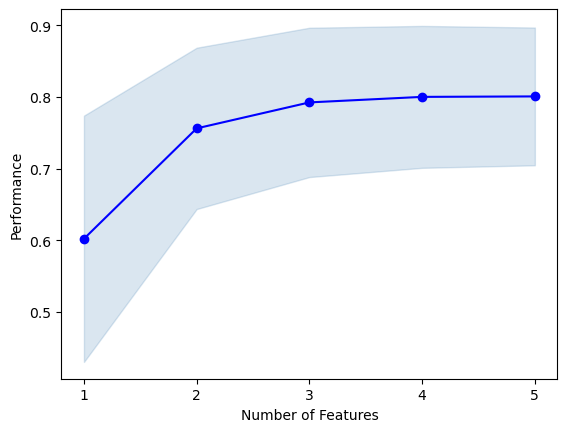

[('age', 'children', 'smoker_yes', 'region_southwest', 'bmi_mul_smoker')]

In [99]:
reg = LinearRegression()

sfs1 = sfs(reg, k_features =5, forward=True, floating=False, scoring='r2',verbose=2,cv=5)
#k_features: number of features you wamt to select we can also pass a tuple k_features=(1,5) to find the best model b/w 1 and 5
#forward: forward = mentions forward selection
#floating: if floating=True then it does a step wise selection i.e., add or remove features 
#scoring: uses r2 scoring here
#verbose = 0(silent shows no details of the feature selection is shown) = 1(shows only the last output of features selected) = 2(Shows detailed result of features added and the validation score)

sfs1 = sfs1.fit(X_interaction_test, y_test)

from mlxtend.plotting import plot_sequential_feature_selection as plt_sfs
plt.figure(figsize=(50,50))
fig1 = plt_sfs(sfs1.get_metric_dict(), kind='std_dev')
plt.show()

result = pd.DataFrame(sfs1.get_metric_dict()).T
result = result[['feature_idx','avg_score','feature_names']]
imp_vars_forward = list(result.feature_names[result['avg_score'] == max(result.avg_score)])
imp_vars_forward

In [100]:
imp_vars_forward

[('age', 'children', 'smoker_yes', 'region_southwest', 'bmi_mul_smoker')]

In [105]:
sfs1.k_feature_names_

('age', 'children', 'smoker_yes', 'region_southwest', 'bmi_mul_smoker')

These are the important features as per Forward Selection

#### 7.2 Backward Selection

In [101]:
sfs2 =  sfs(reg,k_features=5,forward=False,verbose=2,scoring='r2',cv=5)

sfs2 = sfs2.fit(X_interaction_train, y_train)


[2025-09-10 11:55:49] Features: 9/5 -- score: 0.8022469797545648
[2025-09-10 11:55:50] Features: 8/5 -- score: 0.802246979754565
[2025-09-10 11:55:50] Features: 7/5 -- score: 0.8021034481598093
[2025-09-10 11:55:50] Features: 6/5 -- score: 0.801623240140866
[2025-09-10 11:55:50] Features: 5/5 -- score: 0.8017621167091533

In [107]:
sfs2.k_feature_names_

('age', 'children', 'sex_male', 'smoker_yes', 'bmi_mul_smoker')

We have common columns such as 'age', 'children', 'sex_male', 'smoker_yes', 'bmi_mul_smoker' but there is a extra column of  'region_southwest' in forward selction we have to evaluate the model based on these columns and judge based on the model validation scores.

#### 7.3 Exhaustive Feature Selector

In [108]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

An EFS feature selector considers different permutation and combination of columns to check which columns are the best and select those columns whose scores with w.r.t to the model are good.

In [109]:
efs = EFS(LinearRegression(), min_features=1,max_features=5,cv=5,scoring='r2')
efs.fit(X_interaction_train,y_train)

Features: 637/637

ExhaustiveFeatureSelector(estimator=LinearRegression(),
                          feature_groups=[[0], [1], [2], [3], [4], [5], [6],
                                          [7], [8], [9]],
                          max_features=5, scoring='r2')

In [110]:
efs.best_feature_names_

('age', 'children', 'sex_male', 'smoker_yes', 'bmi_mul_smoker')

In [111]:
efs.best_score_

0.8017621167091533

In [115]:
imp_vars_forward

[('age', 'children', 'smoker_yes', 'region_southwest', 'bmi_mul_smoker')]

In [123]:
imp_vars_forward = [imp_vars_forward[0][i] for i in range(len(imp_vars_forward[0]))]

In [142]:
X_interaction_train_forward = X_interaction_train[imp_vars_forward]

In [155]:
X_interaction_train_forward = sm.add_constant(X_interaction_train_forward)

In [127]:
y_train.head()

,charges,log_charges
1043,3161.454000,8.058787
968,3279.868550,8.095559
594,5709.164400,8.649828
1079,15161.534400,9.626517
1051,14394.557900,9.574605


In [151]:
y_train_forward = y_train['charges']

In [156]:
y_train_forward.head()

1043    3161.454000
968     3279.868550
594     5709.164400
1079   15161.534400
1051   14394.557900
Name: charges, dtype: float64

In [157]:
linereg_model_with_forward_selction = sm.OLS(y_train_forward,X_interaction_train_forward).fit()

In [159]:
print(linereg_model_with_forward_selction.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     1044.
Date:                Wed, 10 Sep 2025   Prob (F-statistic):               0.00
Time:                        12:32:52   Log-Likelihood:                -9948.0
No. Observations:                1003   AIC:                         1.991e+04
Df Residuals:                     997   BIC:                         1.994e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2122.2697    493.269  

Prediction Evalution

In [169]:
X_interaction_test_forward = X_interaction_test[imp_vars_forward]
X_interaction_test_forward.shape

(335, 5)

In [172]:
X_interaction_test_forward = sm.add_constant(X_interaction_test_forward)

In [ ]:
y_interaction_test

559     1646.429700
1087   11353.227600
1020    8798.593000
460    10381.478700
802     2103.080000
Name: charges, dtype: float64

In [174]:
predicted_claim = linereg_model_with_forward_selction.predict(X_interaction_test_forward)

actual_claim = y_interaction_test

559     1646.429700
1087   11353.227600
1020    8798.593000
460    10381.478700
802     2103.080000
Name: charges, dtype: float64

In [193]:
linereg_with_forward_selection_rmse = rmse(actual_claim,predicted_claim)

linereg_with_forward_selection_rsquared = linereg_model_with_forward_selction.rsquared

linereg_with_forward_selection_rsq = linereg_model_with_forward_selction.rsquared_adj

linereg_with_forward_selection_metrics = pd.Series({
                     'Model_Name': "Linreg with Forward Selection",
                     'RMSE':linereg_with_forward_selection_rmse,
                     'R-Squared': linereg_with_forward_selection_rsquared,
                     'Adj. R-Squared': linereg_with_forward_selection_rsq     
                   })

linereg_with_forward_selection_metrics

Model_Name        Linreg with Forward Selection
RMSE                                4685.607497
R-Squared                              0.839698
Adj. R-Squared                         0.838894
dtype: object

In [194]:
linereg_with_forward_selection_df = pd.DataFrame(linereg_with_forward_selection_metrics).T

In [195]:
score_card = pd.concat([score_card,linereg_with_forward_selection_df], ignore_index=1)

In [200]:
score_card = score_card.drop([7])

In [202]:
score_card = pd.concat([score_card,linereg_with_forward_selection_df], ignore_index=1)

In [203]:
score_card

,Model_Name,RMSE,R-Squared,Adj. R-Squared,0
0,Linreg full model with log of target variable,17291.501815,0.762914,0.761006,NaN
1,Linreg full model without log of target variable,5982.567065,0.755314,0.753344,NaN
2,Linreg with interaction variable,4672.893439,0.841378,0.839940,NaN
3,Linreg SGD,5144.095031,0.803281,0.797834,NaN
4,Linreg SGD 2000,5130.501846,0.804319,0.798901,NaN
5,Linreg with interaction variable,4685.607497,0.839698,0.838894,NaN
6,Linreg with Forward Selection,4685.607497,0.839698,0.838894,NaN


### 8. Regularization

#### 8.1 Ridge Regression

In [ ]:
ridge  = Ridge(alpha=1)
#by default the Ridge regularization method considers Linear regression
#alpha: gives the weight for Ridge regression coefficient 
y_train_ridge = y_train['charges']

ridge.fit(X_interaction_train, y_train_ridge)

Ridge(alpha=1)

In [211]:
y_test_ridge = y_interaction_test

In [212]:
predicted_ridge = ridge.predict(X_interaction_test)

actual_ridge = y_test_ridge

In [218]:
ridge_mse = mean_squared_error(actual_ridge, predicted_ridge)

ridge_rmse  = np.sqrt(ridge_mse)

ridge_r2 = r2_score(actual_ridge, predicted_ridge)

ridge_adj_r2 = 1-((1 - ridge_r2)*(len(y_test_ridge) - 1)/(len(y_test_ridge) - X_interaction_test.shape[1] - 1))

In [220]:
ridge_model_score = pd.Series({
                     'Model_Name': "Ridge model with alpha 1",
                     'RMSE': ridge_rmse,
                     'R-Squared': ridge_r2,
                     'Adj. R-Squared': ridge_adj_r2     
                   })

Ridge_regression_df = pd.DataFrame(ridge_model_score).T


In [222]:
score_card = pd.concat([score_card,Ridge_regression_df], ignore_index =1)

In [223]:
score_card

,Model_Name,RMSE,R-Squared,Adj. R-Squared,0
0,Linreg full model with log of target variable,17291.501815,0.762914,0.761006,NaN
1,Linreg full model without log of target variable,5982.567065,0.755314,0.753344,NaN
2,Linreg with interaction variable,4672.893439,0.841378,0.839940,NaN
3,Linreg SGD,5144.095031,0.803281,0.797834,NaN
4,Linreg SGD 2000,5130.501846,0.804319,0.798901,NaN
5,Linreg with interaction variable,4685.607497,0.839698,0.838894,NaN
6,Linreg with Forward Selection,4685.607497,0.839698,0.838894,NaN
7,Ridge model with alpha 1,4684.378641,0.836871,0.831836,NaN


In [230]:
ridge2  = Ridge(alpha=2)
#by default the Ridge regularization method considers Linear regression
#alpha: gives the weight for Ridge regression coefficient 
y_train_ridge = y_train['charges']

ridge2.fit(X_interaction_train, y_train_ridge)

Ridge(alpha=2)

In [245]:
y_test_ridge

559     1646.429700
1087   11353.227600
1020    8798.593000
460    10381.478700
802     2103.080000
           ...     
1192   13019.161050
628    11365.952000
1098   23045.566160
1038    2250.835200
936    32108.662820
Name: charges, Length: 335, dtype: float64

In [231]:
predicted_ridge2 = ridge.predict(X_interaction_test)

actual_ridge2 = y_test_ridge

In [232]:
ridge2_mse = mean_squared_error(actual_ridge2, predicted_ridge2)

ridge2_rmse  = np.sqrt(ridge2_mse)

ridge2_r2 = r2_score(actual_ridge2, predicted_ridge2)

ridge2_adj_r2 = 1-((1 - ridge_r2)*(len(y_test_ridge) - 1)/(len(y_test_ridge) - X_interaction_test.shape[1] - 1))

In [235]:
ridge2_model_score = pd.Series({
                     'Model_Name': "Ridge model with alpha 2",
                     'RMSE': ridge2_rmse,
                     'R-Squared': ridge2_r2,
                     'Adj. R-Squared': ridge2_adj_r2     
                   })

Ridge2_regression_df = pd.DataFrame(ridge2_model_score).T


In [236]:
score_card = pd.concat([score_card,Ridge2_regression_df], ignore_index =1)

In [241]:
score_card = score_card.drop([8,9,10])

In [242]:
score_card = pd.concat([score_card,Ridge2_regression_df], ignore_index =1)
score_card

,Model_Name,RMSE,R-Squared,Adj. R-Squared,0
0,Linreg full model with log of target variable,17291.501815,0.762914,0.761006,NaN
1,Linreg full model without log of target variable,5982.567065,0.755314,0.753344,NaN
2,Linreg with interaction variable,4672.893439,0.841378,0.839940,NaN
3,Linreg SGD,5144.095031,0.803281,0.797834,NaN
4,Linreg SGD 2000,5130.501846,0.804319,0.798901,NaN
5,Linreg with interaction variable,4685.607497,0.839698,0.838894,NaN
6,Linreg with Forward Selection,4685.607497,0.839698,0.838894,NaN
7,Ridge model with alpha 1,4684.378641,0.836871,0.831836,NaN
8,Ridge model with alpha 2,4684.378641,0.836871,0.831836,NaN
9,Ridge model with alpha 2,4684.378641,0.836871,0.831836,NaN


In [243]:
score_card = score_card.drop(9)

In [244]:
score_card

,Model_Name,RMSE,R-Squared,Adj. R-Squared,0
0,Linreg full model with log of target variable,17291.501815,0.762914,0.761006,NaN
1,Linreg full model without log of target variable,5982.567065,0.755314,0.753344,NaN
2,Linreg with interaction variable,4672.893439,0.841378,0.839940,NaN
3,Linreg SGD,5144.095031,0.803281,0.797834,NaN
4,Linreg SGD 2000,5130.501846,0.804319,0.798901,NaN
5,Linreg with interaction variable,4685.607497,0.839698,0.838894,NaN
6,Linreg with Forward Selection,4685.607497,0.839698,0.838894,NaN
7,Ridge model with alpha 1,4684.378641,0.836871,0.831836,NaN
8,Ridge model with alpha 2,4684.378641,0.836871,0.831836,NaN


We see that there is not much difference when we increase the wegth of the penalty term in Ridge regresion

#### 8.2 Lasso Regression

In [249]:
lasso = Lasso(alpha=1)

y_train_lasso = y_train['charges']

lasso.fit(X_interaction_train, y_train_lasso)

Lasso(alpha=1)

In [247]:
y_test_lasso = y_interaction_test

In [256]:
predicted_lasso = lasso.predict(X_interaction_test)
actual_lasso = y_test_lasso

In [265]:
lasso_mse = mean_squared_error(actual_lasso, predicted_lasso)

# calculate rmse
lasso_rmse = np.sqrt(lasso_mse)

# calculate R-squared
lasso_r2 = r2_score(actual_lasso, predicted_lasso)

# calculate Adjusted R-squared
lasso_adjr2 = 1 - (1-lasso_r2)*(len(actual_lasso)-1)/(len(actual_lasso)- X_interaction_test.shape[1]-1)

In [266]:
lasso_model_score = pd.Series({
                     'Model_Name': "Lasso model with alpha 1",
                     'RMSE': lasso_rmse,
                     'R-Squared': lasso_r2,
                     'Adj. R-Squared': lasso_adjr2     
                   })

Lasso_regression_df = pd.DataFrame(lasso_model_score).T

In [267]:
score_card = pd.concat([score_card,Lasso_regression_df], ignore_index=1)

In [263]:
score_card = score_card.drop([9,10,11,12])

In [269]:
score_card = score_card.drop([9,10])

In [270]:
score_card = pd.concat([score_card,Lasso_regression_df], ignore_index=1)

In [271]:
score_card

,Model_Name,RMSE,R-Squared,Adj. R-Squared,0
0,Linreg full model with log of target variable,17291.501815,0.762914,0.761006,NaN
1,Linreg full model without log of target variable,5982.567065,0.755314,0.753344,NaN
2,Linreg with interaction variable,4672.893439,0.841378,0.839940,NaN
3,Linreg SGD,5144.095031,0.803281,0.797834,NaN
4,Linreg SGD 2000,5130.501846,0.804319,0.798901,NaN
5,Linreg with interaction variable,4685.607497,0.839698,0.838894,NaN
6,Linreg with Forward Selection,4685.607497,0.839698,0.838894,NaN
7,Ridge model with alpha 1,4684.378641,0.836871,0.831836,NaN
8,Ridge model with alpha 2,4684.378641,0.836871,0.831836,NaN
9,Lasso model with alpha 1,4673.789328,0.837607,0.832595,NaN


#### 8.3 Elastic Net

In [272]:
# Elastic net is a combination of Ridge and Lasso techniques

enet = ElasticNet(alpha = 0.1, l1_ratio = 0.01)
#l1_ratio is the ratio of between Ridge and lasso penalty terms l1_ratio = 0(Ridge), l1_ratio = 1(lasso)
y_train_elastic = y_train['charges']

enet.fit(X_interaction_train, y_train_elastic)

ElasticNet(alpha=0.1, l1_ratio=0.01)

In [273]:
predicted_elastic = enet.predict(X_interaction_test)
actual_elastic = y_interaction_test

In [274]:
elastic_mse = mean_squared_error(actual_elastic, predicted_elastic)

# calculate rmse
elastic_rmse = np.sqrt(lasso_mse)

# calculate R-squared
elastic_r2 = r2_score(actual_elastic, predicted_elastic)

# calculate Adjusted R-squared
elastic_adjr2 = 1 - (1-lasso_r2)*(len(actual_elastic)-1)/(len(actual_elastic)- X_interaction_test.shape[1]-1)

In [275]:
elastic_model_score = pd.Series({
                     'Model_Name': "Elastic model ",
                     'RMSE': elastic_rmse,
                     'R-Squared': elastic_r2,
                     'Adj. R-Squared': elastic_adjr2     
                   })

elastic_regression_df = pd.DataFrame(elastic_model_score).T

In [278]:
elastic_regression_df.head()

,Model_Name,RMSE,R-Squared,Adj. R-Squared
0,Elastic model,4673.789328,0.816043,0.832595


In [276]:
score_card 

,Model_Name,RMSE,R-Squared,Adj. R-Squared,0
0,Linreg full model with log of target variable,17291.501815,0.762914,0.761006,NaN
1,Linreg full model without log of target variable,5982.567065,0.755314,0.753344,NaN
2,Linreg with interaction variable,4672.893439,0.841378,0.839940,NaN
3,Linreg SGD,5144.095031,0.803281,0.797834,NaN
4,Linreg SGD 2000,5130.501846,0.804319,0.798901,NaN
5,Linreg with interaction variable,4685.607497,0.839698,0.838894,NaN
6,Linreg with Forward Selection,4685.607497,0.839698,0.838894,NaN
7,Ridge model with alpha 1,4684.378641,0.836871,0.831836,NaN
8,Ridge model with alpha 2,4684.378641,0.836871,0.831836,NaN
9,Lasso model with alpha 1,4673.789328,0.837607,0.832595,NaN


In [280]:
score_card =pd.concat([score_card, elastic_regression_df], ignore_index=1)

In [281]:
score_card

,Model_Name,RMSE,R-Squared,Adj. R-Squared,0
0,Linreg full model with log of target variable,17291.501815,0.762914,0.761006,NaN
1,Linreg full model without log of target variable,5982.567065,0.755314,0.753344,NaN
2,Linreg with interaction variable,4672.893439,0.841378,0.839940,NaN
3,Linreg SGD,5144.095031,0.803281,0.797834,NaN
4,Linreg SGD 2000,5130.501846,0.804319,0.798901,NaN
5,Linreg with interaction variable,4685.607497,0.839698,0.838894,NaN
6,Linreg with Forward Selection,4685.607497,0.839698,0.838894,NaN
7,Ridge model with alpha 1,4684.378641,0.836871,0.831836,NaN
8,Ridge model with alpha 2,4684.378641,0.836871,0.831836,NaN
9,Lasso model with alpha 1,4673.789328,0.837607,0.832595,NaN


By the above table we can conclude that the however we try to optimize the model, the cost function and model evaluation parameters remain the same for this particular dataset considering only Linear Regression